## Votes

In [1]:
import sqlite3
import os
import numpy as np
from numpy import array, mean
from numpy import diag, savetxt
from numpy import zeros, append
from scipy.linalg import svd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd

## Convert DB query result to matrix

In [16]:
db = sqlite3.connect('predikon.db')
def query_db(query, args=(), one=False):
    cur = db.execute(query, args)
    rv = cur.fetchall()
    return (rv[0] if rv else None) if one else rv


res = query_db('SELECT municipality.id as mcp_id, vote.id as vote_id, ROUND(result.num_yes * 100.0 / result.num_total, 1)/100 AS percentage, municipality.ogd_id  FROM result, municipality, vote where result.municipality_id == municipality.id AND vote.id == result.vote_id ')
rows = np.zeros(len(res)).astype(np.int64)
cols = np.zeros(len(res)).astype(np.int64)
vals = np.zeros(len(res))
ids = np.zeros((2222,1)).astype(np.int64)
voteMatrix = np.zeros((2222,328))
for vote in res:
    voteMatrix[vote[0]-1,vote[1]-1] = vote[2]
    ids[vote[0]-1] = vote[3]
print((voteMatrix[0][0]))
print(ids[2221])


0.635
[261]


## t-SNE



In [17]:
tsne = TSNE(n_components=2, verbose=1)
tsne_results = tsne.fit_transform(voteMatrix)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2222 samples in 0.033s...
[t-SNE] Computed neighbors for 2222 samples in 5.283s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2222
[t-SNE] Computed conditional probabilities for sample 2000 / 2222
[t-SNE] Computed conditional probabilities for sample 2222 / 2222
[t-SNE] Mean sigma: 0.466629
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.096542
[t-SNE] KL divergence after 1000 iterations: 0.905111


(2222, 2)


(-51.02538150949177, 66.22952121896444, -75.35426584391888, 70.18310800700482)

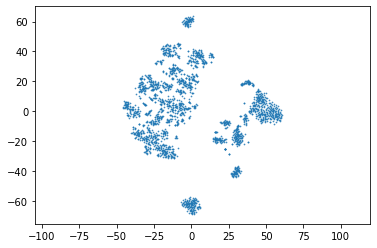

In [14]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
# plot data
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], s=0.5, alpha=0.8)

plt.axis('equal')

## Save

In [15]:

savetxt("tsneMatrix.csv",np.append(tsne_results,ids, axis=1),fmt='%.10f', delimiter=",")
savetxt("ids.csv",ids,fmt='%.1d', delimiter=",")

## Add fake partial data

Useful for testing prediction.

In [21]:
df = pd.read_csv('voteMatrix.csv', delimiter='\t')
# this line creates a new column, which is a Pandas series.
# we then add the series to the dataframe, which holds our parsed CSV file
df['NewColumn'] = pd.Series(ids[:,0])
# save the dataframe to CSV
df.to_csv('new2.csv', sep='\t')

## Add partial data for "Initiative mitage"

In [ ]:
for file in list(reversed(glob.glob('../json/20190210*.json'))):
    with open(file) as f:
        data = json.load(f)
        results = get_results(data)
        save_results(results)
    print(f'Inserted {file}')